<a href="https://colab.research.google.com/github/Mbwas-Ayuba/AI-/blob/main/Iris_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Iris Dataset
# Overview of the dataset
The Iris dataset was used in R.A. Fisher's classic 1936 paper, The Use of Multiple Measurements in Taxonomic Problems.
It includes three iris species with 50 samples each as well as some properties about each flower. One flower species is linearly separable from the other two, but the other two are not linearly separable from each other.

The columns in this dataset are:

Id

SepalLengthCm

SepalWidthCm

PetalLengthCm

PetalWidthCm

Species
# Aim
To use the features in the columns above to classify what category a flower falls into.

# Objectives:
Install and import needed libraries

Load and preview data

Data info

Visualize data

Statistical Summary of data

Feature Scaling

Split data

Train model and

Evaluate model

In [6]:
#@title Install Pandas
!pip install pandas

print("Installation Successful")

Installation Successful


In [7]:
#@title Import Libraries
import pandas as pd
import numpy as np

# For Visuals

import matplotlib.pyplot as plt
import seaborn as sns

# From sklearn library

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay

print("Import Successful")

Import Successful


In [8]:
#@title Load and Preview Data
df = pd.read_csv("/content/Iris.csv")

# Preview
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
#@title Data Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


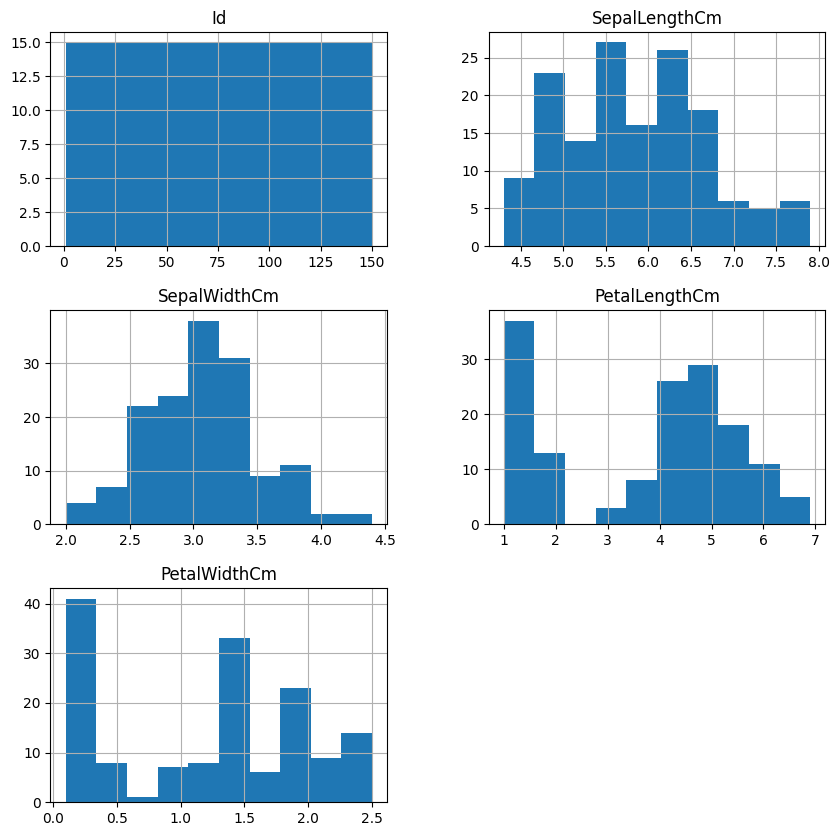

In [10]:
#@title Visualize Data
df.hist(figsize=(10,10))
plt.show()

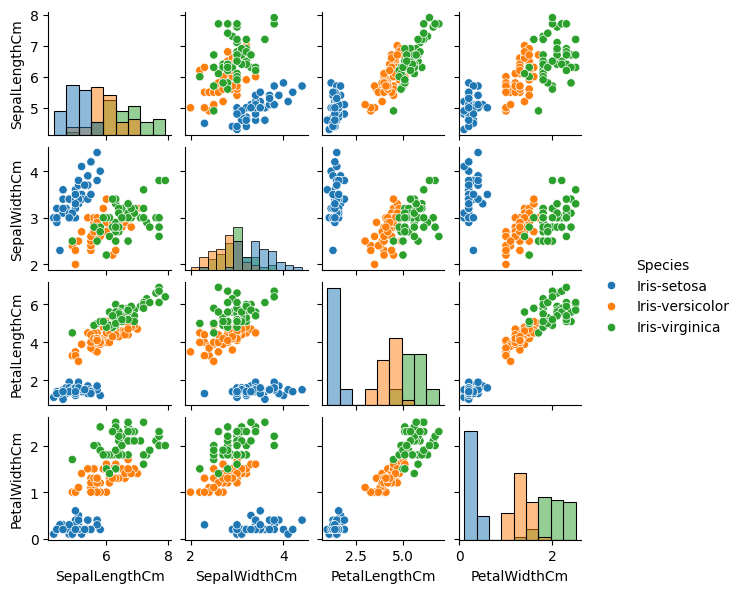

In [11]:
#@title Scatter Plot of Features by Species
sns.pairplot(df.drop("Id", axis=1), hue="Species", diag_kind="hist", height=1.5) # Adjusted height
plt.show()

In [12]:
#@title Statitical Summary of data
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


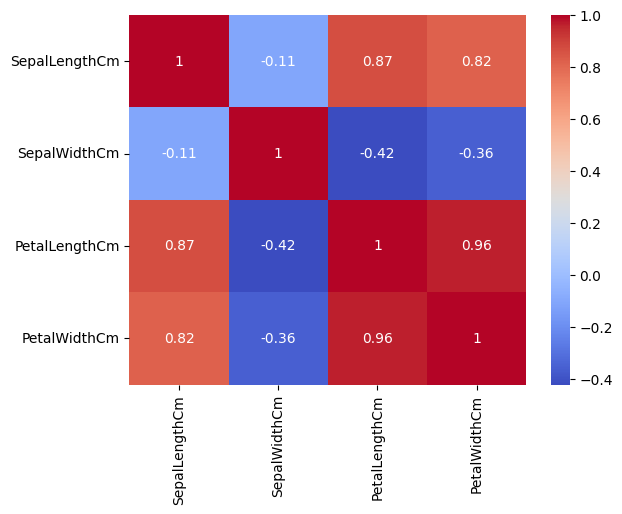

In [13]:
#@title Correlation matrix
corr_matrix = df.drop(["Id", "Species"], axis=1).corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.show()

In [14]:
#@title Feature Encoding
# Reload the original data to ensure the 'Species' column is correct
df = pd.read_csv("/content/Iris.csv")

df["class"] = df["Species"].map({"Iris-setosa": 0, "Iris-versicolor": 1, "Iris-virginica": 2})

df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,class
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0


In [15]:
#@title Split Data
X = df.drop(["Id", "Species", "class"], axis=1)
y = df["class"]

In [16]:
#@title Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [17]:
#@title Training
# Train and Testing data

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Model for training

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [19]:
#@title Evaluate Model
y_pred = knn.predict(X_test)

print("\nAccuracy:", accuracy_score(y_test, y_pred))


Accuracy: 1.0


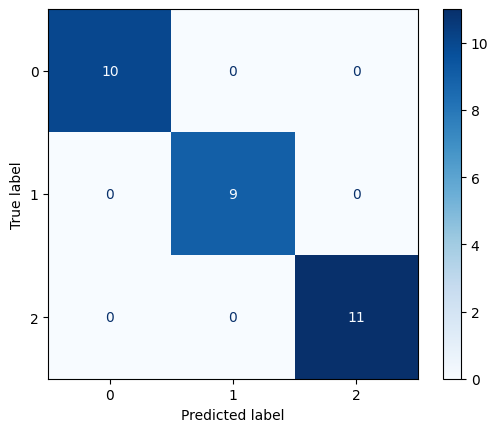

In [21]:
#@title Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [22]:
#@title Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

